In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set_theme(
    style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False}
)
sns.set_style("darkgrid", {"grid.color": "#000000", "grid.linestyle": ":"})
sns.set_palette(
    [
        "#ff6a75",  # cherry-red
        "#0060df",  # ocean-blue
        "#068989",  # moss-green
        "#712290",  # purple
        "#FFA537",  # orange
        "#FF2A8A",  # pink
        "#9059FF",  # lavender
        "#00B3F5",  # light-blue / sky-blue
        "#005e5e",  # dark blueish green
        "#C50143",  # dark-red / maroon
        "#3fe1b0",  # seafoam / mint
        "#063F96",  # dark-blue / navy-blue
        "#FFD567",  # banana-yellow
    ]
)

In [2]:
import pandas as pd

df = pd.read_parquet("soft-search-awards.parquet")
len(df)

82582

In [3]:
df = df[df.majorProgram.isin([
    "BIO",
    "CISE",
    "MPS",
    "ENG",
    "GEO",
])]
df.shape

(61601, 47)

In [4]:
# Filter None abstracts
df = df.dropna(subset=["abstractText"])
len(df)

61594

In [5]:
df["startYear"] = df.startDate.apply(lambda d: d.split("/")[-1])
df["expYear"] = df.expDate.apply(lambda d: d.split("/")[-1])
df["awardDuration"] = df.apply(lambda r: int(r.expYear) - int(r.startYear), axis=1)

## TFIDF Logit Model

In [6]:
from soft_search.label import load_soft_search_model
model = load_soft_search_model()

df["tfidf_prediction"] = model.predict(df.abstractText)
df["tfidf_prediction"].value_counts()

software-not-predicted    46003
software-predicted        15591
Name: tfidf_prediction, dtype: int64

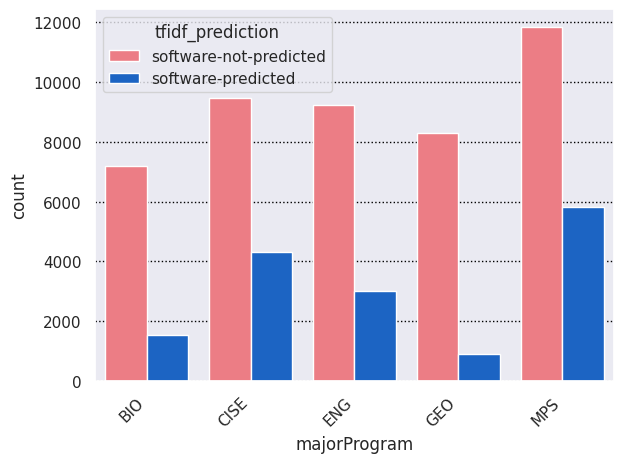

In [7]:
sns.countplot(data=df, x="majorProgram", hue="tfidf_prediction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

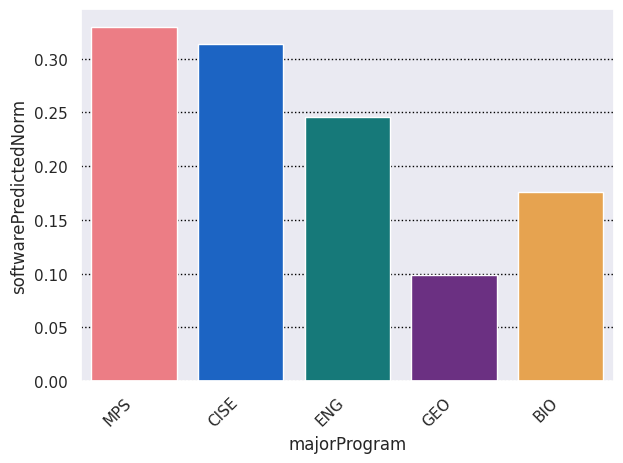

In [8]:
# Normalize
norms = []
for i, count in df.majorProgram.value_counts().items():
    program_preds = df[df.majorProgram == i].tfidf_prediction.value_counts()
    try:
        predicted_count = program_preds.loc["software-predicted"]
    except KeyError:
        predicted_count = 0
    try:
        not_predicted_count = program_preds.loc["software-not-predicted"]
    except KeyError:
        not_predicted_count = 0

    norms.append({
        "majorProgram": i,
        "totalCount": count,
        "softwarePredictedCount": predicted_count,
        "softwareNotPredictedCount": not_predicted_count,
        "softwarePredictedNorm": predicted_count / count,
        "softwareNotPredictedNorm": not_predicted_count / count,
    })

norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="majorProgram", y="softwarePredictedNorm")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

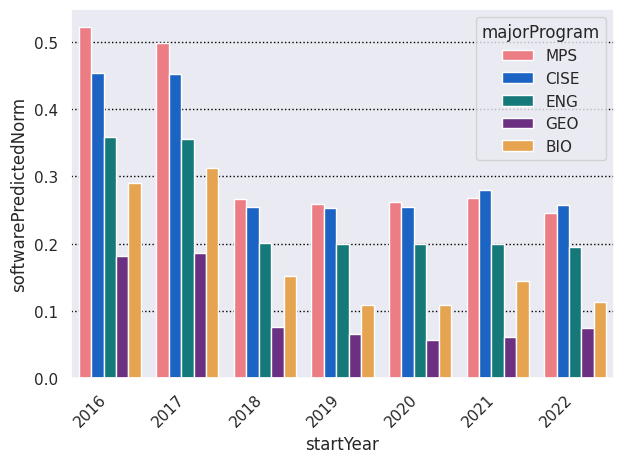

In [9]:
# Normalize per year
norms = []
for startYear in df.startYear.unique():
    year_data = df[df.startYear == startYear]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].tfidf_prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "startYear": startYear,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })

norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="startYear", y="softwarePredictedNorm", hue="majorProgram", order=[str(i) for i in range(2016, 2023)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

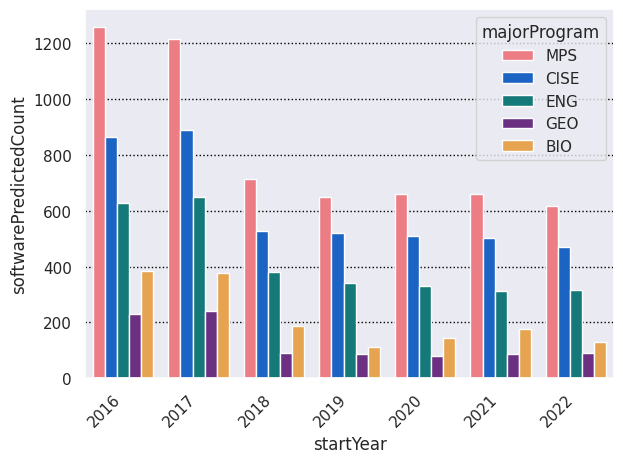

In [10]:
sns.barplot(data=norms, x="startYear", y="softwarePredictedCount", hue="majorProgram", order=[str(i) for i in range(2016, 2023)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

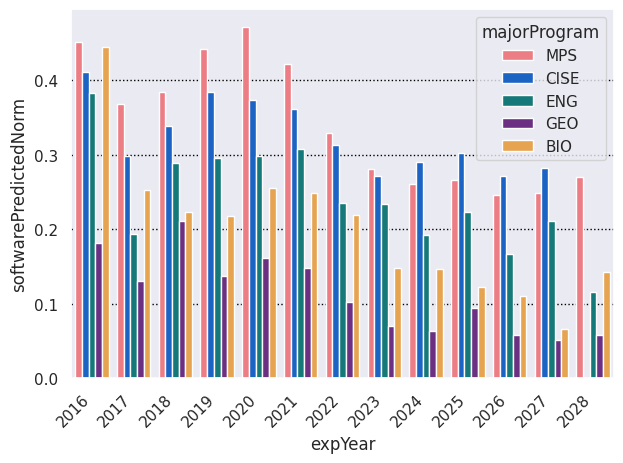

In [11]:
# Normalize per year
norms = []
for expYear in df.expYear.unique():
    year_data = df[df.expYear == expYear]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].tfidf_prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "expYear": expYear,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })


norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="expYear", y="softwarePredictedNorm", hue="majorProgram", order=[str(i) for i in range(2016, 2029)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

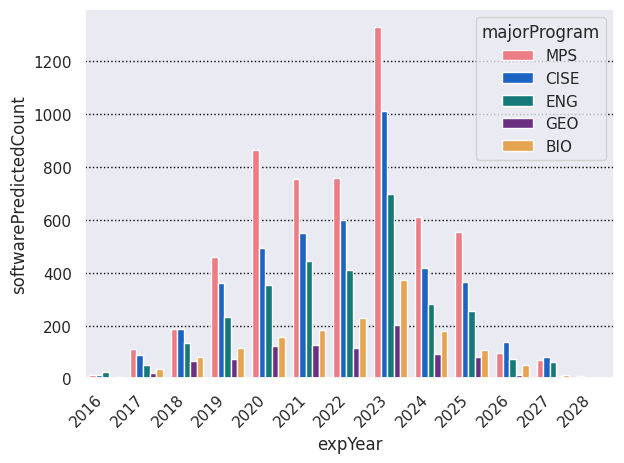

In [12]:
sns.barplot(data=norms, x="expYear", y="softwarePredictedCount", hue="majorProgram", order=[str(i) for i in range(2016, 2029)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

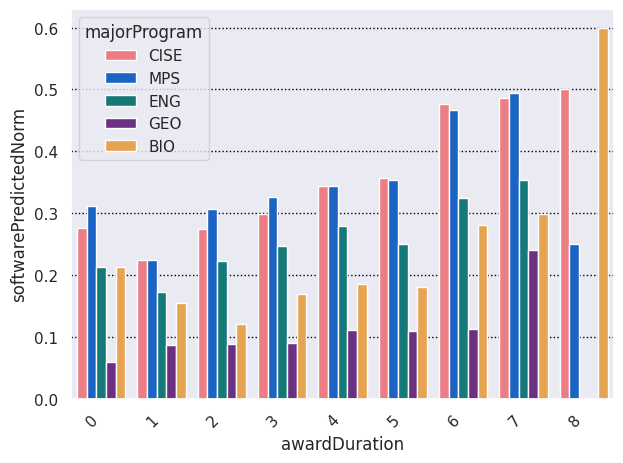

In [13]:
# Normalize per year
norms = []
for awardDuration in df.awardDuration.unique():
    year_data = df[df.awardDuration == awardDuration]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].tfidf_prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "awardDuration": awardDuration,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })


norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="awardDuration", y="softwarePredictedNorm", hue="majorProgram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## Semantic Logit Model

In [14]:
import pickle

with open("soft-search-semantic-logit.pkl", "rb") as open_f:
    model = pickle.load(open_f)

model

Pipeline(steps=[('sentenceencoder',
                 SentenceEncoder(device=device(type='cuda'),
                                 name='distilbert-base-uncased-finetuned-sst-2-english')),
                ('logisticregressioncv', LogisticRegressionCV(max_iter=10000))])

In [15]:
%%time
df["semantic_prediction"] = model.predict(df.abstractText)
df["semantic_prediction"].value_counts()

CPU times: user 22min 27s, sys: 5.95 s, total: 22min 33s
Wall time: 19min 21s


software-not-predicted    46776
software-predicted        14818
Name: semantic_prediction, dtype: int64

In [16]:
df.to_parquet("nsf-awards-with-preds.parquet")

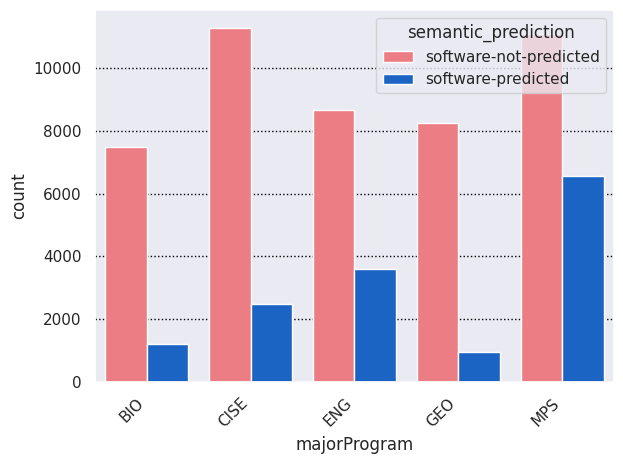

In [17]:
sns.countplot(data=df, x="majorProgram", hue="semantic_prediction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

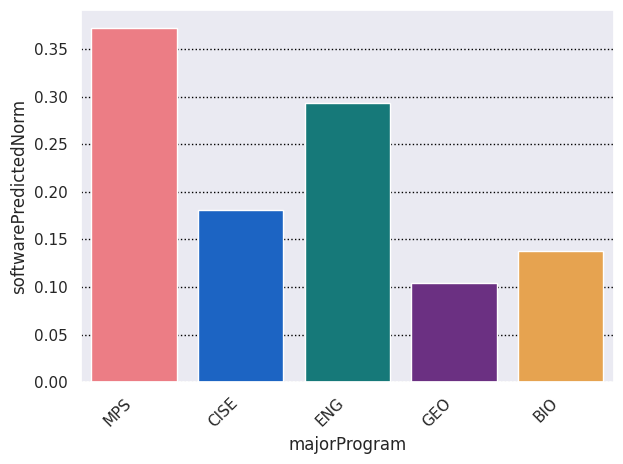

In [18]:
# Normalize
norms = []
for i, count in df.majorProgram.value_counts().items():
    program_preds = df[df.majorProgram == i].semantic_prediction.value_counts()
    try:
        predicted_count = program_preds.loc["software-predicted"]
    except KeyError:
        predicted_count = 0
    try:
        not_predicted_count = program_preds.loc["software-not-predicted"]
    except KeyError:
        not_predicted_count = 0

    norms.append({
        "majorProgram": i,
        "totalCount": count,
        "softwarePredictedCount": predicted_count,
        "softwareNotPredictedCount": not_predicted_count,
        "softwarePredictedNorm": predicted_count / count,
        "softwareNotPredictedNorm": not_predicted_count / count,
    })

norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="majorProgram", y="softwarePredictedNorm")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

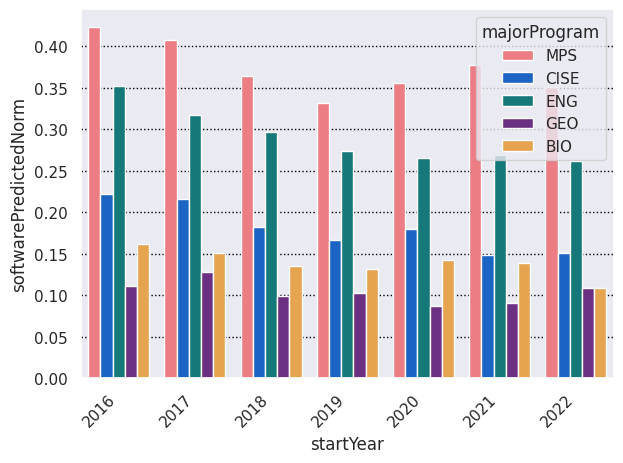

In [19]:
# Normalize per year
norms = []
for startYear in df.startYear.unique():
    year_data = df[df.startYear == startYear]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].semantic_prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "startYear": startYear,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })

norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="startYear", y="softwarePredictedNorm", hue="majorProgram", order=[str(i) for i in range(2016, 2023)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

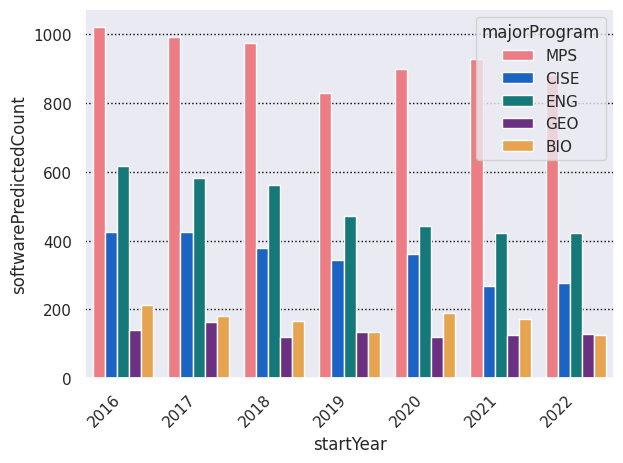

In [20]:
sns.barplot(data=norms, x="startYear", y="softwarePredictedCount", hue="majorProgram", order=[str(i) for i in range(2016, 2023)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

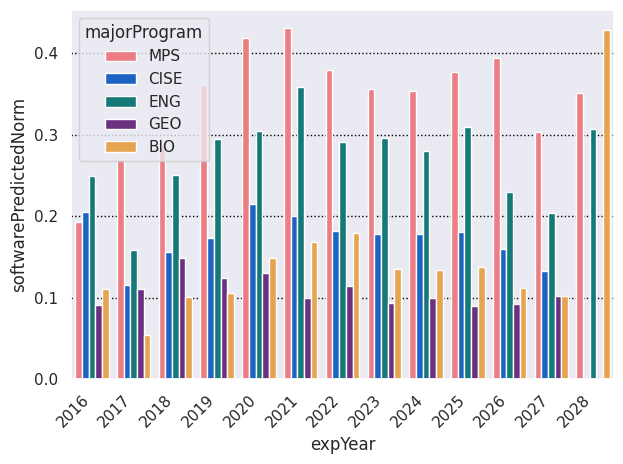

In [21]:
# Normalize per year
norms = []
for expYear in df.expYear.unique():
    year_data = df[df.expYear == expYear]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].semantic_prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "expYear": expYear,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })


norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="expYear", y="softwarePredictedNorm", hue="majorProgram", order=[str(i) for i in range(2016, 2029)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

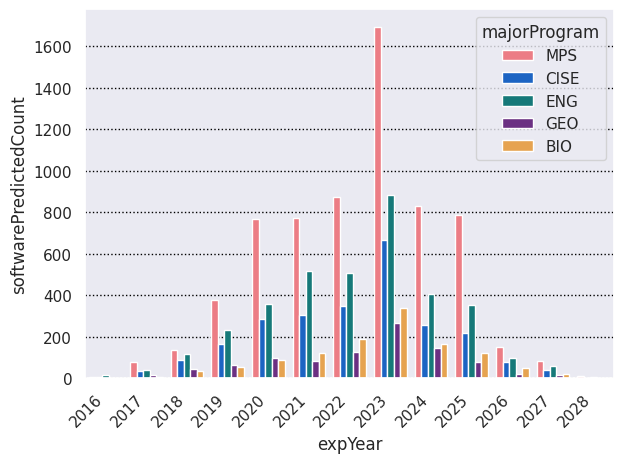

In [22]:
sns.barplot(data=norms, x="expYear", y="softwarePredictedCount", hue="majorProgram", order=[str(i) for i in range(2016, 2029)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

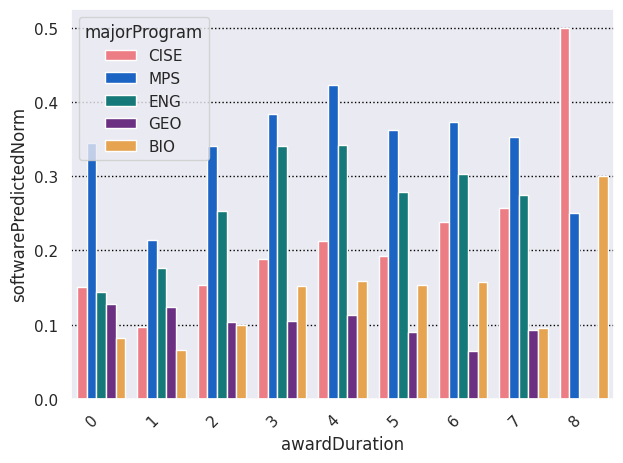

In [23]:
# Normalize per year
norms = []
for awardDuration in df.awardDuration.unique():
    year_data = df[df.awardDuration == awardDuration]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].semantic_prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "awardDuration": awardDuration,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })


norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="awardDuration", y="softwarePredictedNorm", hue="majorProgram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## Direct Comparison

In [28]:
# Normalize
long_form = df[["majorProgram", "tfidf_prediction", "semantic_prediction"]].melt(
    id_vars="majorProgram",
    var_name="model",
    value_vars=["tfidf_prediction", "semantic_prediction"],
)
long_form

,majorProgram,model,value
0,BIO,tfidf_prediction,software-not-predicted
1,BIO,tfidf_prediction,software-not-predicted
2,BIO,tfidf_prediction,software-not-predicted
3,BIO,tfidf_prediction,software-not-predicted
4,BIO,tfidf_prediction,software-not-predicted
...,...,...,...
123183,MPS,semantic_prediction,software-predicted
123184,MPS,semantic_prediction,software-predicted
123185,MPS,semantic_prediction,software-not-predicted
123186,MPS,semantic_prediction,software-not-predicted


<AxesSubplot: xlabel='majorProgram', ylabel='count'>

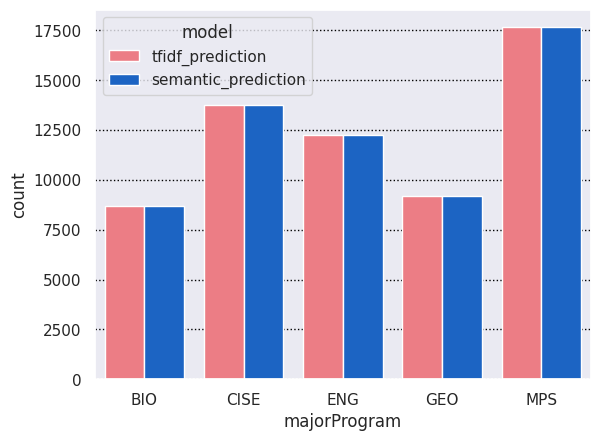

In [30]:
sns.countplot(
    long_form,
    x="majorProgram",
    hue="model",
)